In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
import random

N   = 1000
aux = frange(-1,1,0.001)
x   = np.random.choice(aux, N, replace = True)
y   = np.random.choice(aux, N, replace = True)
z   = np.random.choice(aux, N, replace = True)

# vx  = np.random.choice(aux, N, replace = True)
# vy  = np.random.choice(aux, N, replace = True)
# vz  = np.random.choice(aux, N, replace = True)

x = x*100
y = y*100
z = z*100

r = np.sqrt(x**2 + y**2 + z**2)

mask, = np.where(r<100)

x = x[mask]
y = y[mask]
z = z[mask]

# vx = vx*400 + 100
# vy = vy*400 + 100
# vz = vz*400 + 100

vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)

vx = vx[mask]
vy = vy[mask]
vz = vz[mask]

In [32]:
#W = np.ndarray([len(x),6])
#W[:,0]=x
#W[:,1]=y
#W[:,2]=z
#W[:,3]=vx
#W[:,4]=vy
#W[:,5]=vz
# print W

(-150, 150)

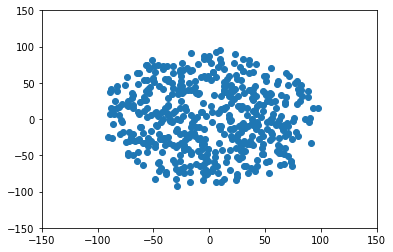

In [33]:
plt.plot(x,y,'o')
plt.xlim(-150,150)
plt.ylim(-150,150)

In [34]:
m = np.ones(len(x))*5e11
m = m/len(m)
print len(m)
# m[0] = 1e20

498


In [35]:
#calculamos la aceleracion

from aceleracion import *

ax, ay, az = aceleracion.a_str(m,x,y,z,len(m))

# d = np.ndarray([np.size(a),3])
# d[:,0] = u_str
# d[:,1] = u_gas
# d[:,2] = u_drk
# np.savetxt('energia_potencial0.dat', d, '%12.6f', '\t')

In [36]:
print ax, ay, az

[  2.47239380e+01   2.31455879e+01  -1.00292450e+02   1.73964432e+02
  -8.63941040e+01  -1.55660629e+02  -1.60998627e+02  -7.48627625e+01
  -9.41400681e+01   2.83096256e+01   4.30121422e+01  -4.12832794e+01
   1.24224472e+02  -8.93857956e+00   3.27092209e+01  -9.25384045e+00
   7.79550018e+01  -3.10293827e+01   1.30898285e+02  -6.50368500e+01
  -5.05405579e+01  -2.62225666e+01  -8.65435181e+01  -1.87176819e+02
   1.58131393e+02   8.19882584e+00   3.36779633e+01   2.03061646e+02
   9.59222412e+01   6.27986298e+01  -3.29408531e+01  -4.31076355e+01
  -1.15340166e+01  -8.53077393e+01  -1.17836227e+02   1.47818283e+02
  -3.39171486e+01  -2.28956795e+01   1.45957870e+02  -1.20063820e+02
  -1.28229630e+02   3.10533581e+01  -7.95136795e+01  -1.38223465e+02
  -1.18380592e+02   1.12436363e+02  -5.89552269e+01   1.42978897e+02
  -5.93827591e+01  -1.32214264e+02   1.76066036e+01  -2.28160305e+01
   1.60934662e+02   8.47519989e+01   1.41323135e+02  -7.31658630e+01
   2.96457806e+01   9.42968521e+01

In [37]:
#R = np.ndarray([len(m),6])
#R[:,0]=vx
#R[:,1]=vy
#R[:,2]=vz
#R[:,3]=ax
#R[:,4]=ay
#R[:,5]=az
# print R

In [38]:
#h = 0.1

#for k in range(0,10):
#    for i in range(0,len(m)):
#        W[i,:] = W[i,:] + h * R[i,:]
#        R[:,0] = W[:,3]
#        R[:,1] = W[:,4]
#        R[:,2] = W[:,5]
        
#        R[:,3], R[:,4], R[:,5] = aceleracion.a_str(m,W[:,0],W[:,1],W[:,2],len(m))
        
        #print W[i,:]
        

In [ ]:
%%timeit

h = 0.001
nit=5000

xx=x
yy=y
zz=z

vxx=vx
vyy=vy
vzz=vz

axx=ax
ayy=ay
azz=az

for k in range(0,nit):
    xx = xx + h * vxx
    yy = yy + h * vyy
    zz = zz + h * vzz

    vxx = vxx + h * axx
    vyy = vyy + h * ayy
    vzz = vzz + h * azz
    
    axx,ayy,azz = aceleracion.a_str(m,xx,yy,zz)


### print W

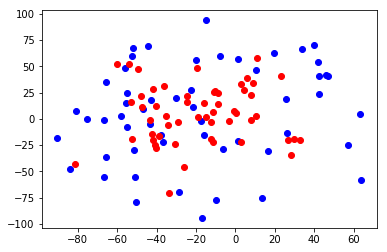

In [26]:
plt.plot(x,y,'o', color='b')
plt.plot(xx,yy,'o', color='r')

In [17]:
from integradores import *
ax,ay,az=integradores.a_str(0.5,m,x,y,z)

In [40]:
%%timeit
h = 0.001
nit=5000
eps=0.5
#h = 0.0001
#nit = 100000
x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0 =integradores.euler(eps,h,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

1 loop, best of 3: 30.2 s per loop


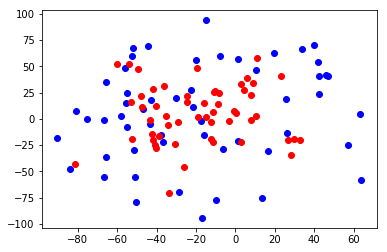

In [28]:
plot(x,y,'o', color='b')
plot(x0,y0,'o', color='r')

In [ ]:
# %%timeit #-r 10 -n 10
# u = 0
# for i in range(1000000000):
#     u = u + 5

In [6]:
# from test import *

In [7]:
# %%timeit
# uu = test.algo(1000000000000000000)

The slowest run took 11.90 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 260 ns per loop


In [62]:
print integradores.__doc__

ax,ay,az = a_str(eps,m,x,y,z,[n])

Wrapper for ``a_str``.

Parameters
----------
eps : input float
m : input rank-1 array('f') with bounds (n)
x : input rank-1 array('f') with bounds (n)
y : input rank-1 array('f') with bounds (n)
z : input rank-1 array('f') with bounds (n)

Other Parameters
----------------
n : input int, optional
    Default: len(m)

Returns
-------
ax : rank-1 array('f') with bounds (n)
ay : rank-1 array('f') with bounds (n)
az : rank-1 array('f') with bounds (n)
x,y,z,vx,vy,vz,ax,ay,az = euler(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az,[n])

Wrapper for ``euler``.

Parameters
----------
eps : input float
dt : input float
nit : input int
m : input rank-1 array('f') with bounds (n)
x : input rank-1 array('f') with bounds (n)
y : input rank-1 array('f') with bounds (n)
z : input rank-1 array('f') with bounds (n)
vx : input rank-1 array('f') with bounds (n)
vy : input rank-1 array('f') with bounds (n)
vz : input rank-1 array('f') with bounds (n)
ax : input rank-1 array('f') 